<a href="https://colab.research.google.com/github/sakamototaisei/python_colab/blob/main/PyTorch%E3%81%A7%E5%AE%9F%E8%A3%85%E3%81%99%E3%82%8B%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **イントロダクション**

## **ディープラーニングとは**

**人工ニューロン**

*   ニューロンへの入力に重みをかけた値を統ベて足し合わせて、バイアスを加える
*   重みはシナプスの伝達効率
*   バイアスはニューロンの感度
*   上記の値を活性化関数で処理し出力とする
*   活性化関数は、値を信号に変換する関数



**人工ニューラルネットワーク**

*   ニューロンを層状に並べたもの
*   数値を入力し、情報を伝播させ結果を出力する
*   出力は確率などの予測値として解釈可能で、ネットワークにより予測を行うことが可能
*   ニューロンや層の数を増やすことによって、高い表現力を発揮するようになる



**バックプロパゲーションによる学習**

*   ニューラルネットワークは、出力と正解の誤差が小さくなる様に重みとバイアスを調整することで学習することができる
*   一層ずつ遡るように誤差を伝播させて重みとバイアスを更新するが、このアルゴリズムは、バックプロパゲーション(誤差逆伝播報)と呼ばれる



**ディープラーニングとは**

*   多数の層からなるニューラルネットワークの学習のことを、ディープラーニング(深層学習)と呼ぶ
*   ヒトの知能に部分的に迫る高い性能をしばしば発揮する



## **PyTorchとは**



*   Define by Run方式を採用し、データを流しながらネットワークの定義と演算を行う
*   Numpyと類似した操作のTensorクラスによりデータを扱う



**各モジュール**


*   autograd：Tensorの各要素による微分を自動で行う機能
*   optim：様々な最適化アルゴリズムを実装したモジュール
*   nn：モデルを構築するためによく使われている層を集めたモジュール



## **Tensorについて**

In [ ]:
!pip list

In [ ]:
import torch

a = torch.tensor([1, 2, 3])
print(a, type(a))

tensor([1, 2, 3]) <class 'torch.Tensor'>


In [ ]:
# 2中のリストから生成
b = torch.tensor([[1, 2],
                  [3, 4]])
print(b)

# dtypeを指定し、倍精度のTensorにする
c = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float64)
print(c)

# 0から9までの数値で初期化
d = torch.arange(0, 10)
print(d)

# 全ての値が0の、2x3のTensor
e = torch.zeros(2, 3)
print(e)

# 全ての値が乱数の、2x3のTensor
f = torch.rand(2, 3)
print(f)

# Tensorの形状はsizeメソッドで取得
print(f.size())

tensor([[1, 2],
        [3, 4]])
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.7646, 0.7821, 0.4529],
        [0.7776, 0.4118, 0.1279]])
torch.Size([2, 3])


**TensorとNumPyの配列の変換**

numpy()メソッドでTensorをNumPyの配列に変換することができる

また、from_numpy()関数でNumPyの配列をTensorに変換することができます

In [ ]:
# Tensor → NumPy
a = torch.tensor([[1, 2],
                  [3, 4]])
b = a.numpy()
print(b, type(b))

# NumPy　→ Tensor
c = torch.from_numpy(b)
print(c, type(c))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>
tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>


In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# 2つのインデックスを指定
print(a[0, 1])

# 範囲の指定
print(a[1:2, :2])

# リストで複数のインデックスを指定
print(a[:, [0, 2]])

# 3より大きい要素のみを指定
print(a[a > 3])

# 要素の変更
a[0, 2] = 11
print(a)

# 要素の一括変更
a[:, 1] = 22
print(a)

# 10より大きい要素のみ変更
a[a>10] = 33
print(a)

tensor(2)
tensor([[4, 5]])
tensor([[1, 3],
        [4, 6]])
tensor([4, 5, 6])
tensor([[ 1,  2, 11],
        [ 4,  5,  6]])
tensor([[ 1, 22, 11],
        [ 4, 22,  6]])
tensor([[ 1, 33, 33],
        [ 4, 33,  6]])


**Tensorの演算**

Tensorによりベクトルや行列を表現することができる

これらの演算は、一定のルールに基づき行われる

In [ ]:
# ベクトル
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

# 行列
c = torch.tensor([[6, 5, 4],
                  [3, 2, 1]])

# ベクトルとスカラーの演算
print(a + 3)

# ベクトル同士の演算
print(a + b)

# 行列とスカラーの演算
print(c + 2)

# 行列とベクトルの演算(ブロードキャスト)
print(c + a)

# 行列通しの演算
print(c + c)

tensor([4, 5, 6])
tensor([5, 7, 9])
tensor([[8, 7, 6],
        [5, 4, 3]])
tensor([[7, 7, 7],
        [4, 4, 4]])
tensor([[12, 10,  8],
        [ 6,  4,  2]])


**様々な値の計算**

平均値、合計値、最大値、最小値、などの様々な値を計算する関数とメソッドが用意されている

In [ ]:
a = torch.tensor([[1, 2, 3],
                  [4, 5, 6]],
                 dtype=torch.float64)

# 平均値を求める関数
m = torch.mean(a)
print(m.item()) # item()で値を取り出す

# 平均値を求めるメソッド
m = a.mean()
print(m.item())

# 列ごとの平均値(0で列1で行)
print(a.mean(0))

# 合計値
print(torch.sum(a).item())

# 最大値
print(torch.max(a).item())

# 最小値
print(torch.min(a).item())

3.5
3.5
tensor([2.5000, 3.5000, 4.5000], dtype=torch.float64)
21.0
6.0
1.0


# **PyTorchで実装する簡単なディープラーニング**

## **勾配効果法**

**勾配降下法とは**



*   ニューラルネットワークの学習に使われる
*   出力と正解の間の誤差を、曲線を滑り落ちる様にして最小化する



$$w ← w - \eta \frac{\partial E}{\partial w}$$

$$w：重み$$

$$\eta：学習係数$$

$$E：誤差$$

## **活性化関数と損失関数**

**活性化関数**

*   ニューロンの興奮/抑制状態を決める関数
*   関数への入力を、興奮/抑制状態を表す値に変換する

**シグモイド関数**

$$y = \frac{1}{1 + exp(-x)}$$

最近使われているのがR**eLU関数**

$$y = \begin{Bmatrix}
   0 (x≦0)\\
   x (x > 0)
\end{Bmatrix}$$




**損失関数(誤差関数)**

*   出力と正解の間の誤差を定義する関数

**二乗和誤差**

$$E = \frac{1}{2}\sum_{k=1}^n(y_k - t_k)^2$$

$$n：出力層のニューロン数$$

**交差エントロピー誤差**

*   多クラス分類問題でよく使われる損失関数
*   多クラス分類問題では、正解は1つだけ1で残りは0

$$E = -log(y) = -log(\frac{exp(x)}{\sum_{k=1}^nexp(x_k)})$$

$$x：活性化関数への入力$$

$$n：出力層のニューロン数$$

## **最適化アルゴリズム**



*   パラメータを調整し誤差を最小化するためのアルゴリズム
*   ex)夜の山岳地帯で谷底を目指すためのアルゴリズム



**SGD(確率的勾配降下法)**

訓練データからランダムにデータを取り出すため確率的

$$w ← w - \eta \frac{\partial E}{\partial w}$$

$$w：重み$$

$$\eta：学習係数$$

$$E：誤差$$

**AdaGrad**


*   学習が進むとともにパラメータの更新量が低下
*   最初を広い領域で探索し、次第に探索範囲を絞る

$$h ← h + (\frac{\partial E}{\partial w})^2$$

$$w ← w - \eta \frac{1}{\sqrt{h}}\frac{\partial E}{\partial w}$$

$$w：重み$$

$$\eta：学習係数$$

$$E：誤差$$

 **Adam**

*   学習の進行度合いや過去の履歴に基づき、更新量が調整される




## **簡単なディープラーニングの実装**

手描き文字画像の確認

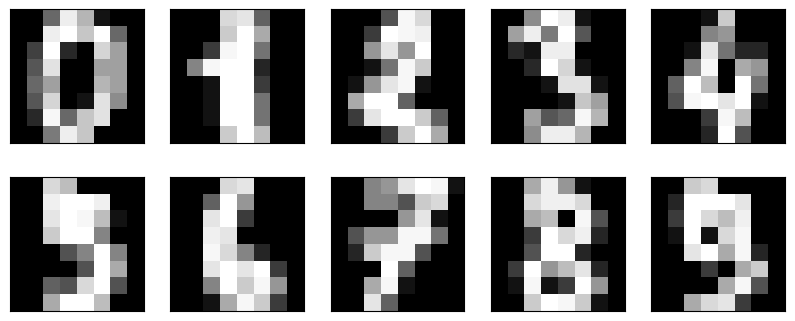

データの形状： (1797, 64)
ラベル： [0 1 2 3 4 5 6 7 8 9]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

n_img = 10 # 表示する画像の数
plt.figure(figsize=(10, 4))

for i in range(n_img):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(digits_data.data[i].reshape(8, 8), cmap='Greys_r')
    ax.get_xaxis().set_visible(False) # 軸を非表示に
    ax.get_yaxis().set_visible(False)
plt.show()

print('データの形状：', digits_data.data.shape)
print('ラベル：', digits_data.target[:n_img])

データを訓練用とテスト用に分割

In [5]:
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels) # 25%がテスト用

# Tensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test, dtype=torch.int64)

モデルを構築

nnモジュールのSequentialクラスによりモデルを構築する

In [6]:
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32), # 全結合層
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10) # 0~9の分類をするため出力は10となる
)
print(net)

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)


学習

モデルを訓練する

今回は、損失関数に交差エントロピー誤差を、最適化アルゴリズムにSGD(確率的勾配降下法)を設定する

順伝播は訓練データ、テストデータ両者で行い誤差を計算する

逆伝播を行うのは、訓練データのみ

In [7]:
from torch import optim

# 交差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01) # 学習率は0.01

# 損失のログ
record_loss_train = []
record_loss_test = []

# 1000エポック学習
for i in range(1000):
    # 勾配を0に
    optimizer.zero_grad()

    # 順伝播
    y_train = net(x_train)
    y_test = net(x_test)

    # 誤差を求める
    loss_train = loss_fnc(y_train, t_train)
    loss_test = loss_fnc(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝播(勾配を求める)
    loss_train.backward()

    # パラメータの更新
    optimizer.step()

    if i % 100 == 0:
        print('Epoch:', i, 'Loss_Train:', loss_train.item(), 'Loss_Test:', loss_test.item())

Epoch: 0 Loss_Train: 2.519376039505005 Loss_Test: 2.4164841175079346
Epoch: 100 Loss_Train: 1.115484356880188 Loss_Test: 1.1585962772369385
Epoch: 200 Loss_Train: 0.5136207342147827 Loss_Test: 0.6007373332977295
Epoch: 300 Loss_Train: 0.3060990273952484 Loss_Test: 0.4001491069793701
Epoch: 400 Loss_Train: 0.21064098179340363 Loss_Test: 0.30333393812179565
Epoch: 500 Loss_Train: 0.1610938459634781 Loss_Test: 0.25424349308013916
Epoch: 600 Loss_Train: 0.1311330646276474 Loss_Test: 0.22710195183753967
Epoch: 700 Loss_Train: 0.11102744936943054 Loss_Test: 0.2100570946931839
Epoch: 800 Loss_Train: 0.09633415192365646 Loss_Test: 0.19861185550689697
Epoch: 900 Loss_Train: 0.08503606170415878 Loss_Test: 0.1905619204044342


誤差の推移

訓練データ、テストデータで誤差の推移をグラフ化する

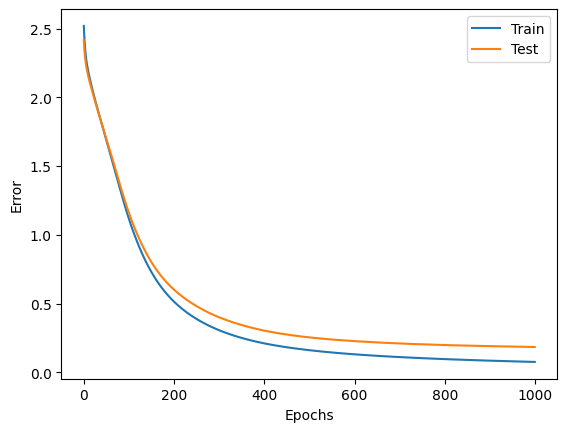

In [8]:
plt.plot(range(len(record_loss_train)), record_loss_train, label='Train')
plt.plot(range(len(record_loss_test)), record_loss_test, label='Test')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

正解率

モデルの性能を把握するために、テストデータを使い正解率を測定する

In [12]:
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print(count)
print(len(y_test))
print('正解率：', str(count/len(y_test)*100) + '%')

427
450
正解率： 94.88888888888889%


訓練済みのモデルを使った予測

訓練済みのモデルを使って画像を入力し、モデルが機能していることを確かめる

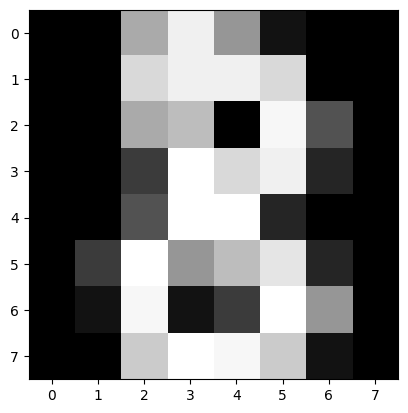

正解： 8 予測結果: 8


In [15]:
img_id = 8
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap='Greys_r')
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print('正解：', labels[img_id], '予測結果:', y_pred.argmax().item())

# **PyTorchの様々な機能**

## **自動微分**